# Compile Bolus & Molecular Scans

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

analyzed_mice = ['m907','m925', 'm937']


bolus_scan_paths = [
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/LSBolusAV/LSBolusAV/m907/m907d20150410BolusFull4DMasked.nii'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/LSBolusAV/LSBolusAV/m907/m907d20150411BolusFull4DMasked.nii')
    ],
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/CTBolusAV/m925/m925d20150604BolusFull4DMasked.nii'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/CTBolusAV/m925/m925d20150605BolusFull4DMasked.nii')
    ],
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/LSBolusCTRL/LSBolusCTRL/m937/m937d20150629BolusFull4DMasked.nii'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/LSBolusCTRL/LSBolusCTRL/m937/m937d20150630BolusFull4DMasked.nii')
    ]
]

molecular_scan_paths = [
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected/m907/20150410121501.008 KDR.nii.gz'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected/m907/20150411155038.334 KDR.nii.gz')
    ],
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/m925/m925/20150604114249.016 kdr.nii.gz'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/m925/m925/20150605102716.490 kdr.nii.gz')
    ],
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected (2)/m937/20150629163513.298 kdr.nii.gz'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected (2)/m937/20150630135750.768 kdr.nii.gz')
    ]
]
molecular_segmentation_paths = [
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected/m907/nifti_segmentation_QUANTUS/20150410121501.008_KDR_segmentation.nii.gz'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected/m907/nifti_segmentation_QUANTUS/20150411155038.334_KDR_segmentation.nii.gz'),
    ],
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/m925/m925/nifti_segmentation_QUANTUS/20150604114249.016_kdr_segmentation.nii.gz'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/m925/m925/nifti_segmentation_QUANTUS/20150605102716.490_kdr_segmentation.nii.gz')
    ],
    [
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected (2)/m937/nifti_segmentation_QUANTUS/20150629163513.298_kdr_segmentation.nii.gz'),
        Path('/Volumes/CREST Data/David_S_Data/3D Paramap Project/mCEUS-selected (2)/m937/nifti_segmentation_QUANTUS/20150630135750.768_kdr_segmentation.nii.gz')
    ]
]

# Verify masks are formatted correctly

In [6]:
# Bolus masks are formatted correctly as they are integrated with original scan

In [7]:
# Verifying masks for molecular scans
test_scan_path = molecular_scan_paths[0][0]
test_mask_path = molecular_segmentation_paths[2][0]

In [8]:
import nibabel as nib

test_scan = nib.load(str(test_scan_path))
test_mask = nib.load(str(test_mask_path))

In [170]:
test_scan = nib.load(str(molecular_scan_paths[2][1]))
test_scan.header['pixdim']

array([1.        , 0.21311963, 0.10808638, 0.27172986, 0.5916408 ,
       0.        , 0.        , 0.        ], dtype=float32)

In [173]:
test_bolus_scan_path = bolus_scan_paths[0][0]
bolus_scan = nib.load(str(test_bolus_scan_path))

In [174]:
bolus_scan.header['pixdim']

array([1. , 0.3, 0.3, 0.3, 1. , 0. , 0. , 0. ], dtype=float32)

In [5]:
scan = test_scan.get_fdata()
mask = test_mask.get_fdata()

In [115]:
test_bolus_scan_path = bolus_scan_paths[0][0]
bolus_scan = nib.load(str(test_bolus_scan_path)).get_fdata()

In [10]:
min_index = np.unravel_index(np.argmax(bolus_scan), bolus_scan.shape)
min_index

(np.int64(7), np.int64(31), np.int64(62), np.int64(67))

In [11]:
bolus_scan.shape
t_bolus_scan = np.transpose(bolus_scan)
t_bolus_scan.shape

(133, 93, 120, 172)

In [23]:
np.unravel_index(np.argmax(t_bolus_scan), t_bolus_scan.shape)

(np.int64(64), np.int64(59), np.int64(44), np.int64(11))

In [47]:
from scipy.ndimage import binary_fill_holes
from scipy.ndimage import binary_dilation, binary_erosion

test_mask = (t_bolus_scan > 9).astype(np.uint8)
# Dilate and erode to interpolate borders
dilated_mask = binary_dilation(test_mask)
eroded_mask = binary_erosion(dilated_mask)
interpolated_mask = eroded_mask.astype(np.uint8)
# filled_test_mask = binary_fill_holes(test_mask).astype(np.uint8)

In [49]:
from scipy.ndimage import find_objects

# Find the bounding box of the non-zero regions in the mask
slices = find_objects(test_mask)
borders = slices[0]  # Assuming there's only one object in the mask
new_mask = np.zeros_like(test_mask)
new_mask[borders] = test_mask[borders]
# new_mask

In [69]:
newer_mask = (np.max(t_bolus_scan, axis=3) > 0).astype(np.uint8)
filled_test_mask = binary_fill_holes(newer_mask).astype(np.uint8)
newer_mask.shape

(133, 93, 120)

In [170]:
t_bolus_scan = np.transpose(bolus_scan).astype(np.uint8).astype(np.uint32)
mask = (np.max(t_bolus_scan, axis=3) > 0).astype(np.uint8)
mask = binary_fill_holes(mask).astype(np.uint8)

In [114]:
np.amax(cur_scan)

np.int64(206)

In [166]:
stats_filter = sitk.StatisticsImageFilter()
stats_filter.Execute(cur_scan)
min_value = stats_filter.GetMinimum()
max_value = stats_filter.GetMaximum()
min_value, max_value

(0.0, 206.0)

In [172]:
cur_scan = sitk.GetImageFromArray(t_bolus_scan[:,:,:,41])
cur_mask = sitk.GetImageFromArray(mask)
extractor.execute(cur_scan, cur_mask)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'),
             ('diagnostics_Versions_Numpy', '2.1.3'),
             ('diagnostics_Versions_SimpleITK', '2.4.0'),
             ('diagnostics_Versions_PyWavelet', '1.7.0'),
             ('diagnostics_Versions_Python', '3.11.6'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True,
               'weightingNorm': None}),
             ('diagnostics_Configuration_EnabledImageTypes', {'

In [155]:
np.amin(test_bolus_scan)

np.float64(0.0)

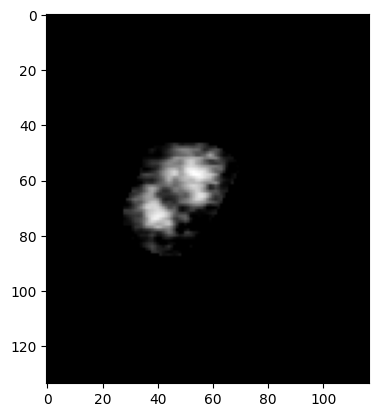

In [171]:
plt.imshow(t_bolus_scan[:, 50, :, 41], cmap='gray')
# plt.imshow(mask[:, 50, :], cmap='jet', alpha=0.5)

In [19]:
np.unravel_index(np.argmax(mask), mask.shape)

(np.int64(38), np.int64(132), np.int64(64))

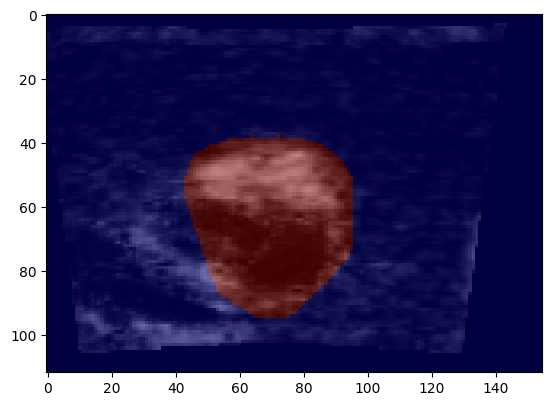

In [20]:
plt.imshow(t_scan[:,132,:,50], cmap='gray')
plt.imshow(mask[:, 132, :], cmap='jet', alpha=0.5)
plt.show()

Found first scan doesn't need transpose but the rest do

# Complete analysis & store results

In [2]:
from radiomics import featureextractor

In [3]:
params = Path("..") / "params.yml"
extractor = featureextractor.RadiomicsFeatureExtractor(str(params))

NameError: name 'Path' is not defined

In [5]:
import SimpleITK as sitk
from scipy.ndimage import binary_fill_holes
import nibabel as nib
from tqdm import tqdm
import logging

logger = logging.getLogger("radiomics.glcm")
logger.setLevel(logging.ERROR)

bolus_features_by_mouse = []
molecular_features_by_mouse = []

for i, mouse in enumerate(tqdm(analyzed_mice)):
    bolus_features = []
    for bolus_path in bolus_scan_paths[i]:
        scan = nib.load(str(bolus_path)).get_fdata().astype(np.uint8).astype(np.uint32)
        scan = np.transpose(scan)
        mask = (np.max(scan, axis=3) > 0).astype(np.uint8)
        mask = binary_fill_holes(mask).astype(np.uint8)
        mask = sitk.GetImageFromArray(mask)
        
        scan_features = []
        for v in range(scan.shape[3]):
            cur_scan = sitk.GetImageFromArray(scan[:,:,:,v])
            scan_features.append(
                extractor.execute(cur_scan, mask)
            )
        bolus_features.append(scan_features)
    bolus_features_by_mouse.append(bolus_features)
    
import pickle

with open('bolus_features.pkl', 'wb') as f:
    pickle.dump(bolus_features_by_mouse, f)
del bolus_features_by_mouse

 33%|███▎      | 1/3 [02:23<04:46, 143.03s/it]/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_86827/151747371.py:16: RuntimeWarning: invalid value encountered in cast
  scan = nib.load(str(bolus_path)).get_fdata().astype(np.uint8).astype(np.uint32)
100%|██████████| 3/3 [06:50<00:00, 136.75s/it]


In [4]:
import SimpleITK as sitk
import nibabel as nib
import pickle
import gc
from tqdm import tqdm
import logging

logger = logging.getLogger("radiomics.glcm")
logger.setLevel(logging.ERROR)

molecular_features_by_mouse = []
for i, mouse in enumerate(analyzed_mice):

    molecular_features = []
    for j, molecular_path in enumerate(molecular_scan_paths[i]):
        if not i or (i == 1 and j == 0):
            continue
        print(molecular_path.name)
        scan = nib.load(str(molecular_path)).get_fdata().astype(np.uint8).astype(np.uint32)
        scan = np.transpose(scan)
        mask = nib.load(str(molecular_segmentation_paths[i][j])).get_fdata().astype(np.uint8)
        mask = sitk.GetImageFromArray(mask)
        
        scan_features = []
        for v in tqdm(range(scan.shape[3])):
            cur_scan = sitk.GetImageFromArray(scan[:,:,:,v])
            assert cur_scan.GetSize() == mask.GetSize()
            scan_features.append(
                extractor.execute(cur_scan, mask)
            )
        print("Saving features to pkl...")
        molecular_features.append(scan_features)
        with open(f'molecular_features_{i}_{j}.pkl', 'wb') as f:
            pickle.dump(scan_features, f)
    
        del cur_scan, mask, scan_features, scan
        gc.collect()
    molecular_features_by_mouse.append(molecular_features)

20150605102716.490 kdr.nii.gz


100%|██████████| 444/444 [5:17:55<00:00, 42.96s/it]  


Saving features to pkl...
20150629163513.298 kdr.nii.gz


100%|██████████| 542/542 [26:01<00:00,  2.88s/it]


Saving features to pkl...
20150630135750.768 kdr.nii.gz


100%|██████████| 539/539 [09:27<00:00,  1.05s/it]


Saving features to pkl...


# EDA

## Load PKL Files

In [3]:
import pickle
from pathlib import Path

molecular_features_by_mouse_pkl_paths = [
    [
        Path('molecular_features_0.pkl'),
        Path('molecular_features__0_1.pkl')
    ],
    [
        Path('molecular_features_1_0.pkl'),
        Path('molecular_features_1_1.pkl')
    ],
    [
        Path('molecular_features_2_0.pkl'),
        Path('molecular_features_2_1.pkl')
    ]
]

bolus_features_by_mouse_pkl_path = Path('bolus_features.pkl')
with open(bolus_features_by_mouse_pkl_path, 'rb') as f:
    bolus_features_by_mouse = pickle.load(f)
        
molecular_features_by_mouse = []
for i, mouse in enumerate(molecular_features_by_mouse_pkl_paths):
    with open(molecular_features_by_mouse_pkl_paths[i][0], 'rb') as f:
        molecular_features_0 = pickle.load(f)
    with open(molecular_features_by_mouse_pkl_paths[i][1], 'rb') as f:
        molecular_features_1 = pickle.load(f)
        
    molecular_features_by_mouse.append([molecular_features_0, molecular_features_1])

## Explore Time Texture Curves (TTC)

In [4]:
list(molecular_features[0].keys()).index("original_firstorder_Mean")

NameError: name 'molecular_features' is not defined

In [10]:
import nibabel as nib
nib.load(molecular_scan_paths[0][1]).header['pixdim']

array([1.        , 0.15912749, 0.07518349, 0.23168929, 0.5910753 ,
       0.        , 0.        , 0.        ], dtype=float32)

In [9]:
70*.7446

52.122

original_gldm_SmallDependenceLowGrayLevelEmphasis


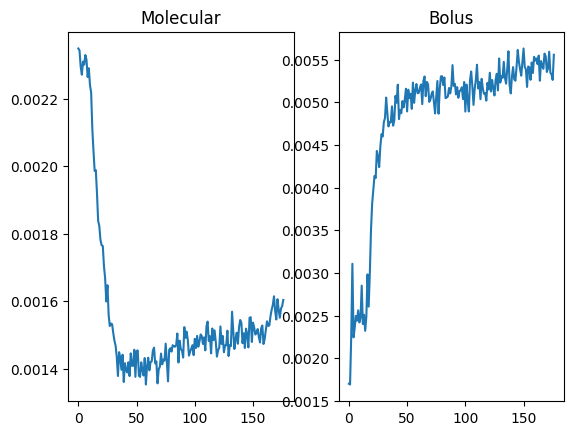

In [6]:
import matplotlib.pyplot as plt
import numpy as np

mouse_idx = 0; day = 0; feature_idx = 123
# For feature 123, note curve increases between days 0 and 1 for the first 2 mice, but not for the third
# 38 is firstorder energy - largest absolute difference between bolus and molecular
# 44 is the TIC


molecular_features = list(molecular_features_by_mouse[mouse_idx][day])
bolus_features = list(bolus_features_by_mouse[mouse_idx][day])
feature = list(molecular_features[0].keys())[feature_idx]
molecular_feature_curve = [feature_scan[feature] for feature_scan in molecular_features][10:10+len(bolus_features)]
bolus_feature_curve = [feature_scan[feature] for feature_scan in bolus_features]

x_molecular = np.arange(len(molecular_feature_curve))
x_bolus = np.arange(len(bolus_feature_curve))

print(feature)
fig, axs = plt.subplots(1,2)
axs[0].plot(x_molecular, molecular_feature_curve)
axs[0].set_title("Molecular")
axs[1].plot(x_bolus, bolus_feature_curve)
axs[1].set_title("Bolus")
plt.show()

In [12]:
from collections import defaultdict

feature_differences = defaultdict(lambda: 0)
for mouse_idx in range(len(analyzed_mice)):
    molecular_features = molecular_features_by_mouse[mouse_idx]
    bolus_features = bolus_features_by_mouse[mouse_idx]
    
    feature_keys = list(molecular_features[0][0].keys())
    
    for i, molecular_day in enumerate(molecular_features):
        for feature_key in feature_keys:
            molecular_values = np.array([molecular_scan[feature_key] for molecular_scan in molecular_day])
            bolus_values = np.array([bolus_scan[feature_key] for bolus_scan in bolus_features[i]])
            
            try:
                difference = np.abs(molecular_values.mean() - bolus_values.mean())
            except TypeError:
                continue
            feature_differences[feature_key] += difference

In [13]:
max_difference = 0
max_difference_feature = ""
for feature_key, difference in feature_differences.items():
    if difference > max_difference:
        print(feature_key)
        max_difference = difference
        max_difference_feature = feature_key

diagnostics_Image-original_Size
diagnostics_Mask-original_VoxelNum
original_firstorder_Energy


In [14]:
max_difference_feature

'original_firstorder_Energy'

## Differentiate molecular scans from perfusion/bolus scans

Note that frame rates for the bolus scans can't be found, so we aren't looking at true TTC's.

In [15]:
import pandas as pd

features_df = pd.DataFrame(columns=["Mouse", "Day", "Scan Type", "Feature", "Value vs Frame"])

features_of_interest = np.loadtxt("../pyradiomics_features_of_interest.txt", dtype=str)

for mouse_idx in range(len(analyzed_mice)):
    molecular_features = molecular_features_by_mouse[mouse_idx]
    bolus_features = bolus_features_by_mouse[mouse_idx]
    
    for i, molecular_day in enumerate(molecular_features):
        for feature_key in features_of_interest:
            molecular_values = np.array([molecular_scan[feature_key] for molecular_scan in molecular_day])
            bolus_values = np.array([bolus_scan[feature_key] for bolus_scan in bolus_features[i]])
            
            new_molecular_row = pd.DataFrame({"Mouse": [analyzed_mice[mouse_idx]], "Day": [i], "Scan Type": ["Molecular"], "Feature": [feature_key], "Value vs Frame": [molecular_values]})
            new_bolus_row = pd.DataFrame({"Mouse": [analyzed_mice[mouse_idx]], "Day": [i], "Scan Type": ["Bolus"], "Feature": [feature_key], "Value vs Frame": [bolus_values]})
            features_df = pd.concat([features_df, new_molecular_row, new_bolus_row], ignore_index=True)

In [16]:
features_df.describe()

,Mouse,Day,Scan Type,Feature,Value vs Frame
count,1176,1176,1176,1176,1176
unique,3,2,2,98,1176
top,m907,0,Molecular,diagnostics_Image-original_Minimum,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
freq,392,588,588,12,1


In [17]:
# Cutting off all molecular curves at 300 frames to avoid noise at the end of all curves
features_df["Value vs Frame"] = features_df["Value vs Frame"].apply(lambda x: x[:300])

In [18]:
features_df["Value vs Frame"][11].shape

(177,)

In [19]:
features_df.loc[features_df["Feature"] == feature, "Scan Type"].iloc[0]

'Molecular'

In [20]:
growth_rates = []

cur_val = vals[0]
for val in vals[1:]:
    growth_rates.append((val - cur_val) / cur_val)
    cur_val = val
    
np.mean(growth_rates)
    

NameError: name 'vals' is not defined

In [84]:
coarse_molecular_growth_rates = []
coarse_bolus_growth_rates = []

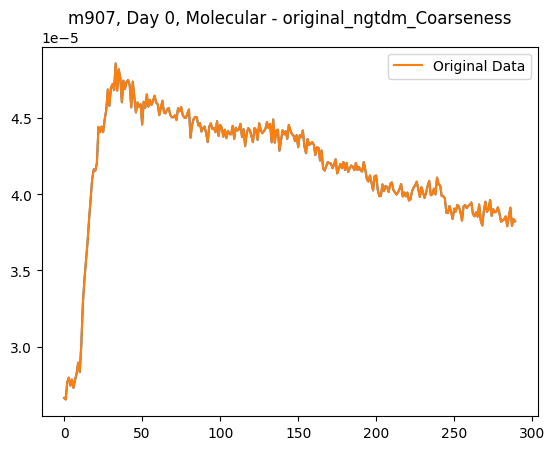

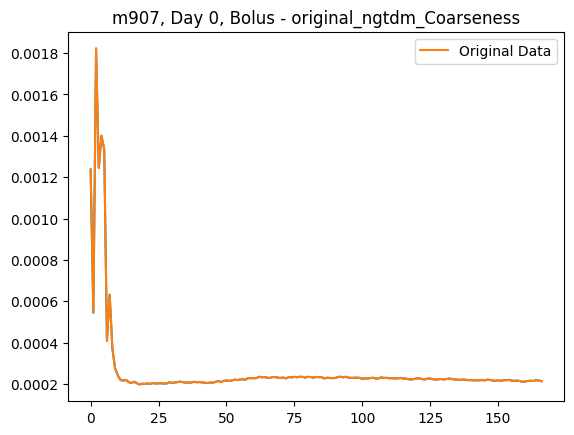

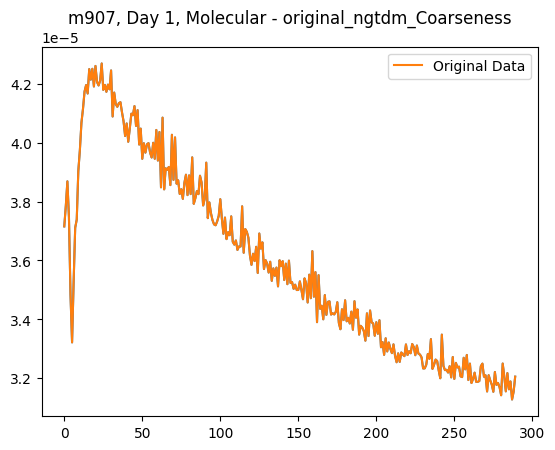

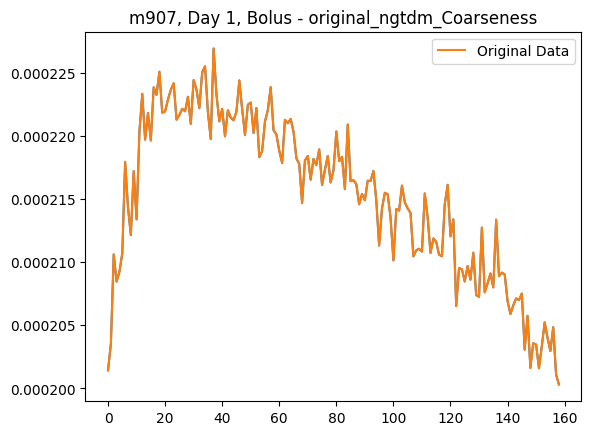

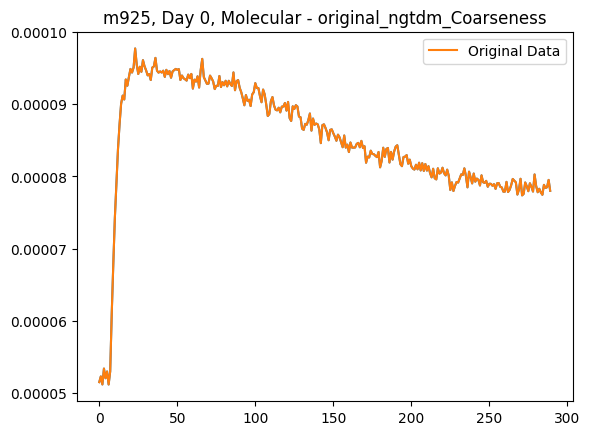

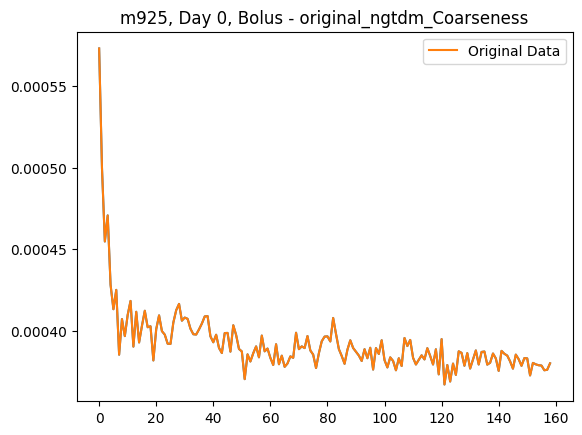

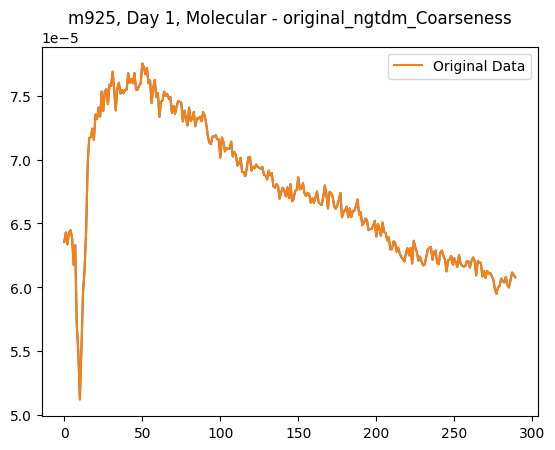

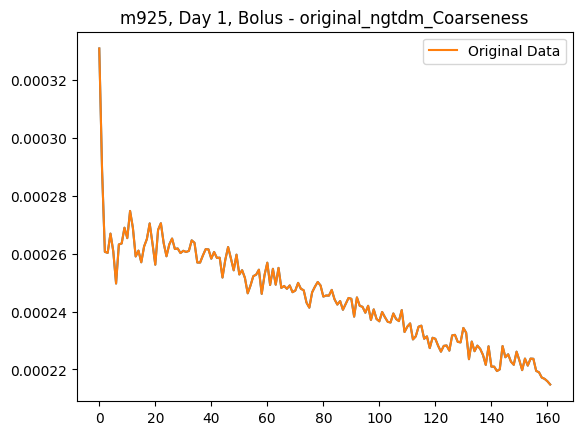

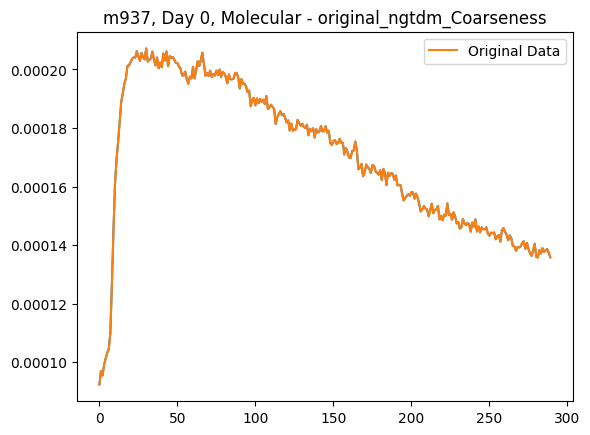

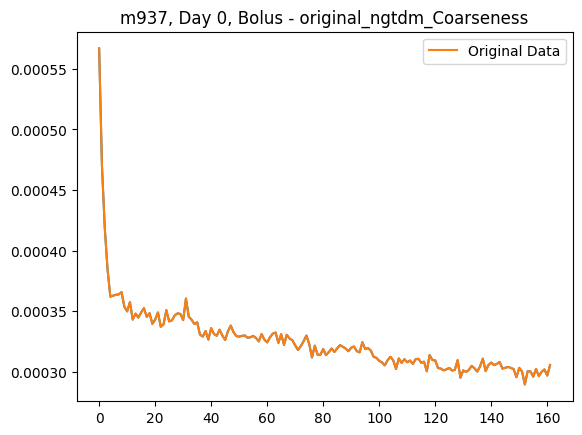

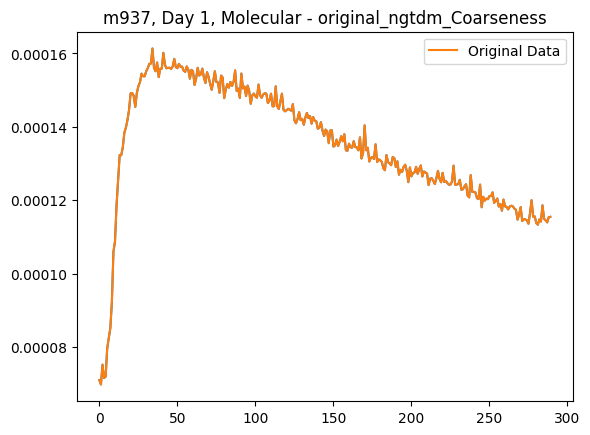

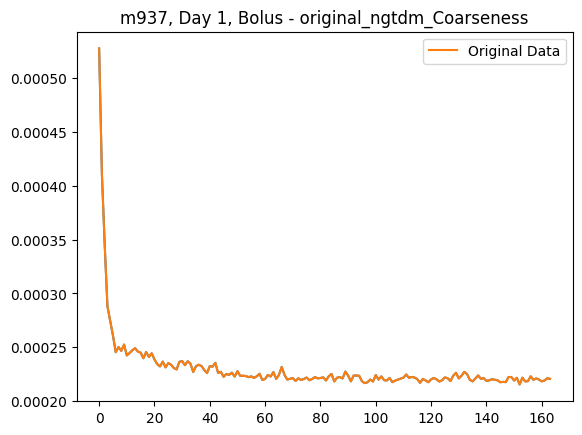

In [85]:
# There are distinct differences in shape between molecular and bolus for all mice except for responding mice

feature = "original_ngtdm_Coarseness"
idx = 2
for idx in range(12):


    vals = features_df.loc[features_df["Feature"] == feature, "Value vs Frame"].values[idx][10:300]
    plt.plot(vals)

    # def bolus_lognormal(x, auc, mu, sigma, t0):        
    #     curve_fit=(auc/(2.5066*sigma*(x-t0)))*np.exp(-1*(((np.log(x-t0)-mu)**2)/(2*sigma*sigma))) 
    #     return np.nan_to_num(curve_fit)

    # fitted_curve = curve_fit(bolus_lognormal, np.arange(len(vals)), vals, p0=[1, 1, 1, -1], maxfev=100000)

    coarse_growth_rates = []

    cur_val = vals[0]
    for val in vals[1:]:
        coarse_growth_rates.append((val - cur_val) / cur_val)
        cur_val = val
        
    if not idx % 2:
        coarse_molecular_growth_rates.append(np.mean(coarse_growth_rates))
    else:
        coarse_bolus_growth_rates.append(np.mean(coarse_growth_rates))

    # Plot the original data and the fitted exponential curve
    plt.plot(vals, label='Original Data')
    # plt.plot(bolus_lognormal(np.arange(len(vals)), *fitted_curve[0]), label='Fitted Curve')
    plt.title(f"{features_df.loc[features_df['Feature'] == feature, 'Mouse'].iloc[idx]}, Day {features_df.loc[features_df['Feature'] == feature, 'Day'].iloc[idx]}, {features_df.loc[features_df['Feature'] == feature, 'Scan Type'].iloc[idx]} - {feature}")
    plt.legend()
    plt.show()

In [86]:
np.min(coarse_molecular_growth_rates) > np.max(coarse_bolus_growth_rates)

np.False_

In [87]:
np.min(coarse_molecular_growth_rates), np.max(coarse_bolus_growth_rates)

(np.float64(-0.00033062130078340374), np.float64(0.0030254994886599355))

In [88]:
coarse_molecular_growth_rates

[np.float64(0.0013893722383985633),
 np.float64(-0.00033062130078340374),
 np.float64(0.001602772971914861),
 np.float64(-3.340069989357393e-05),
 np.float64(0.0015189402108504073),
 np.float64(0.0019310663303184108)]

In [89]:
coarse_bolus_growth_rates

[np.float64(0.0030254994886599355),
 np.float64(3.679564918242975e-05),
 np.float64(-0.002190388306452395),
 np.float64(-0.002459075672866286),
 np.float64(-0.0035174224965394793),
 np.float64(-0.00485569760019957)]

In [22]:
# Difference is calculated as proportional difference between molecular and bolus scans
difference_df = pd.DataFrame(columns=["Mouse", "Day", "Feature", "Proportional Differences", "Mean Proportional Difference"])

for mouse_idx in range(len(analyzed_mice)):
    molecular_features = molecular_features_by_mouse[mouse_idx]
    bolus_features = bolus_features_by_mouse[mouse_idx]
    
    for i, molecular_day in enumerate(molecular_features):
        for feature_key in features_of_interest:
            molecular_values = np.array([molecular_scan[feature_key] for molecular_scan in molecular_day])[:300]
            bolus_values = np.array([bolus_scan[feature_key] for bolus_scan in bolus_features[i]])
            bolus_values = np.interp(np.linspace(0, len(bolus_values) - 1, len(molecular_values)), np.arange(len(bolus_values)), bolus_values)
            
            difference = bolus_values / molecular_values
            if np.isnan(difference).any():
                continue
            
            new_molecular_row = pd.DataFrame({"Mouse": [mouse_idx], "Day": [i], "Feature": [feature_key], "Proportional Differences": [difference], "Mean Proportional Difference": [difference.mean()]})
            difference_df = pd.concat([difference_df, new_molecular_row], ignore_index=True)

/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_5243/3498817381.py:14: RuntimeWarning: invalid value encountered in divide
  difference = bolus_values / molecular_values
/var/folders/5z/myjw1nc12n3g808z31wz0kt80000gn/T/ipykernel_5243/3498817381.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  difference_df = pd.concat([difference_df, new_molecular_row], ignore_index=True)


In [23]:
max_diff_entry = difference_df.nlargest(10, 'Mean Proportional Difference')
max_diff_entry

,Mouse,Day,Feature,Proportional Differences,Mean Proportional Difference
284,1,0,original_ngtdm_Coarseness,"[19296.212354226038, 10882010051.234531, 16959...",1.133000e+08
380,1,1,original_ngtdm_Coarseness,"[7797.37282584778, 16805.624810284717, 19438.1...",1.727872e+02
92,0,0,original_ngtdm_Coarseness,"[2799.819315705525, 3506.57465003235, 3311.513...",4.377489e+01
476,2,0,original_ngtdm_Coarseness,"[1398.3017184661608, 3919.1779354497708, 5013....",4.265597e+01
383,1,1,original_ngtdm_Strength,"[323.9984087319607, 595.6419297474032, 651.429...",1.111378e+01
287,1,0,original_ngtdm_Strength,"[557.6623733830405, 235.4712557722604, 0.76088...",9.962809e+00
188,0,1,original_ngtdm_Coarseness,"[51.14304055015031, 257.40459697731393, 365.37...",9.342668e+00
95,0,0,original_ngtdm_Strength,"[47.348963451910485, 59.34998103881385, 96.394...",8.435838e+00
572,2,1,original_ngtdm_Coarseness,"[378.8919686490665, 436.9436605689512, 412.296...",6.670429e+00
185,0,1,original_gldm_SmallDependenceHighGrayLevelEmph...,"[0.19941526862270928, 0.16814111695111486, 0.2...",5.263331e+00


In [24]:
molecular_growth_rates = []
bolus_growth_rates = []

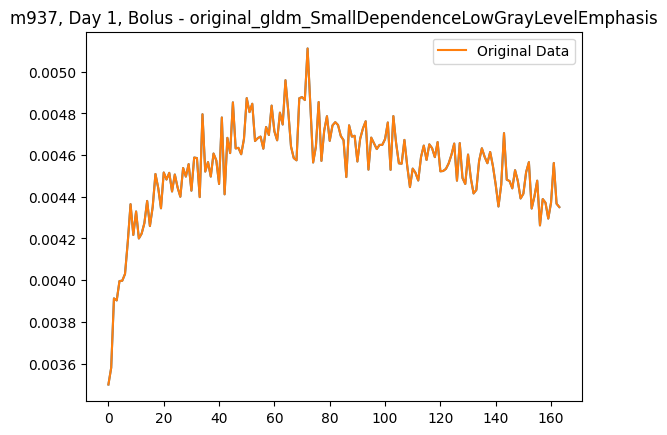

In [ ]:
# There are distinct differences in shape between molecular and bolus for all mice here

feature = "original_gldm_SmallDependenceLowGrayLevelEmphasis"
idx = 11

vals = features_df.loc[features_df["Feature"] == feature, "Value vs Frame"].values[idx][10:300]
plt.plot(vals)

# def bolus_lognormal(x, auc, mu, sigma, t0):        
#     curve_fit=(auc/(2.5066*sigma*(x-t0)))*np.exp(-1*(((np.log(x-t0)-mu)**2)/(2*sigma*sigma))) 
#     return np.nan_to_num(curve_fit)

# max_vals = max(vals)
# fitted_curve = curve_fit(bolus_lognormal, np.arange(len(vals)), vals/max_vals)

# Plot the original data and the fitted exponential curve
plt.plot(vals, label='Original Data')
# plt.plot(bolus_lognormal(np.arange(len(vals)), *fitted_curve[0])*max_vals, label='Fitted Curve')
plt.title(f"{features_df.loc[features_df['Feature'] == feature, 'Mouse'].iloc[idx]}, Day {features_df.loc[features_df['Feature'] == feature, 'Day'].iloc[idx]}, {features_df.loc[features_df['Feature'] == feature, 'Scan Type'].iloc[idx]} - {feature}")
plt.legend()

growth_rates = []

cur_val = vals[0]
for val in vals[1:]:
    growth_rates.append((val - cur_val) / cur_val)
    cur_val = val
    
# if idx % 2:
#     molecular_growth_rates.append(np.mean(growth_rates))
# else:
#     bolus_growth_rates.append(np.mean(growth_rates))
    
plt.show()

In [486]:
assert np.min(molecular_growth_rates) > np.max(bolus_growth_rates)

In [487]:
thresh = (np.min(molecular_growth_rates) + np.max(bolus_growth_rates)) / 2

growth_rates = molecular_growth_rates + bolus_growth_rates
scans = ["Molecular"] * len(molecular_growth_rates) + ["Bolus"] * len(bolus_growth_rates)

correctness = []
for i, rate in enumerate(growth_rates):
    if rate > thresh:
        prediction = "Molecular"
    else:
        prediction = "Bolus"
    if prediction == scans[i]:
        correctness.append(1)
    else:
        correctness.append(0)
        
print("Accuracy:", np.mean(correctness)) # Perfect accuracy

Accuracy: 1.0
